# Mini Project 2: The Tacoma Bridge


On Nov. 7, 1940, photographer Leonard Coatsworth was halfway across Washington’s Tacoma Narrows Bridge when he felt it move strangely:

“Just as I drove past the towers, the bridge began to sway violently from side to side. Before I realized it, the tilt became so violent that I lost control of the car. … I jammed on the brakes and got out, only to be thrown onto my face against the curb… Around me I could hear concrete cracking. … The car itself began to slide from side to side of the roadway.”


In this notebook, you will find the guidelines to complete your mini-project 2 on the Tacoma bridge problem. 

As illustrated in the lecture, we solve here the time evolution of the bridge oscillations, by solving coupled differential equations. 

In this mini project you implement
the Taylor's method outlined in the lecture to the Tacoma Bridge (TB).






## Overview of the Mini project

In this project we will :

In this exercise, you will use the this Jupyter Notebook to experiment with various model parameters and settings. You should understand the code and how it works. Notice that it is organized into distinct sections: preamble, parameter declaration, and model code. This provides a good coding practice, as to streamline your program. 

Here we define the code for our model in the lecture. This is primarily composed of a single function, which we will call pendulum. We must:

0) Load any modules required

0) Define any fixed parameters that would not change

0) Define a list of arguments that can be specified by the user. We must set default values for these parameters.

0) Define a list of initial conditions for our model. We must also specify these in the calling arguments so that the user can change them. We must set default values for these parameters.

0) Create the structures that are required for our model to run

0) Set the initial conditions

0) Integrate our model, with ideally a choice of the Taylor's approach, or the small
modification provided by the Cromer's approach
  


### Import the Numpy and Matplotlib modules

As we practiced in the past notebooks, we import here the relevant modules. 






In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline





## Solving the Tacoma Bridge problem

We start by defining a few physical constant:

The start time of the simulation, tstart [s]
The end time of the simulation, tend [s] 
The rest of the parameters are as defined in the lecture.

Note that here we use slightly modified constant values for convenience
(the calculations are a bit faster in this regime).



In [2]:

tstart=0
tend=100

d=0.01
a=1
M=2500
K=10000
l=6





## Problem 1 :  Model

Implement both explicit and semi-implicit integration of a simple pendulum.

Modify the pendulum function to account for the additional input parameters.

The modified function should now also solve both the time evolution of the vertical displacement $y(t)$ and torsion angle $\theta(t)$.

In this first attempt, we do not include any external force wind. 








In [17]:
def forceModel(x):
    # x is a vector of the form [y, y', theta, theta']
    # want to return the respective derivatives - [y', y'', theta', theta'']
    
    y = x[0]
    y_1 = x[1]
    theta = x[2]
    theta_1 = x[3]
    
    #these are the forces    
    y_2 = -d * y_1 - (K/M * (y - l * np.sin(theta)) + K/M * (y + l * np.sin(theta)))
    
    theta_2 = -d * theta_1 + 3 * np.cos(theta) / l * (K/M * (y - l * np.sin(theta)) - K/M * (y + l * np.sin(theta)))
    
    #we already have y_1 and theta_1
    
    return [y_1, y_2, theta_1, theta_2]
    


def tacoma(dt=0.01, cromer=False, y_init = 0.0, theta_init = 0.0, z_init = 0.0, gamma_init = 0.0, eqs = lambda x : x):

    # Create the variables to store our results
    times=np.arange(tstart, tend+dt, dt)  # Create the array of model times
    Nt=len(times)                         # Number of time-steps
    y=np.zeros(Nt)                   
    theta=np.zeros(Nt)                   
    z=np.zeros(Nt) 
    gamma=np.zeros(Nt) 

    # Set our initial conditions
    y[0] = y_init
    theta[0] = theta_init
    z[0] = z_init
    gamma[0] = gamma_init
  


    # Loop over all of our times and integrate the model
    for n in range(Nt-1):
        #Next step
        
        x_new = eqs([y[n], z[n], theta[n], gamma[n], times[n]])


        # Time-step the angle. If we are using 'Taylor' or 'Cromer"
        z[n+1] = z[n] + x_new[1] * dt
        gamma[n+1] = gamma[n] + x_new[3] * dt
        
        if cromer:
            
            y[n+1] = y[n] + z[n+1] * dt
            theta[n+1] = theta[n] + gamma[n+1] * dt
        
        else:
            
            y[n+1] = y[n] + z[n] * dt
            theta[n+1] = theta[n] + gamma[n] * dt
  




    return times, theta, y

## Problem 2 : Solving the differential equation

Fill in the blanks in the tacoma solver. 

Using the parameters from the lecture notes, run the model and make three plots, in absence of external applied force (no wind force). 

Time-series of $\theta$

Time-series of $y$

Start from a small original torsion angle $\theta(t=0)=0.01$. Compare the time evolution obtained with an initial larger torsion angle $\theta(t=0)=0.1$ and 
with no initial torsion angle $\theta(t=0)=0.0$. Discuss the obtained behavior.

To test the validity of your integrator, compare the Cromer (Euler implicit) method against the Taylor's method. Check that you obtain the same results for both methods.





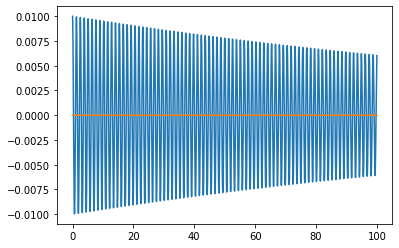

In [18]:

times, theta, y = tacoma(cromer=True, theta_init = 0.01, eqs = forceModel)

plt.plot(times, theta)
plt.plot(times, y)

plt.show()










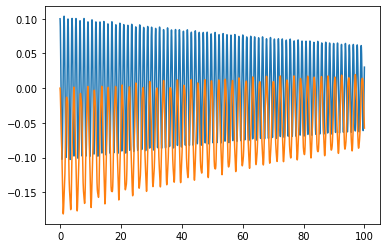

In [53]:
#Use the better force model for cables

def betterForceModel(x):
    # x is a vector of the form [y, y', theta, theta']
    # want to return the respective derivatives - [y', y'', theta', theta'']
    
    y = x[0]
    y_1 = x[1]
    theta = x[2]
    theta_1 = x[3]
    
    #these are the forces    
    y_2 = -d * y_1 - K/(M*a) * (np.exp(a * (y - l * np.sin(theta))) - 1 + np.exp(a * (y + l * np.sin(theta))) - 1)
    
    theta_2 = -d * theta_1 + 3 * np.cos(theta) / l * K / (M * a) * ( np.exp(a * (y - l * np.sin(theta))) - np.exp(a * (y + l * np.sin(theta))))
    #we already have y_1 and theta_1
    
    return [y_1, y_2, theta_1, theta_2]

times, theta, y = tacoma(cromer=True, theta_init = 0.1, y_init = 0.0, eqs = betterForceModel)

plt.plot(times, theta)
plt.plot(times, y)

plt.show()

What do you observe? 

Answer :  .....


## Problem 3 : Wind force

Modify the tacoma solver to account for the wind force.

We model this force by a vertical force:

$$ F(t) = A \sin( \omega t ) $$

where $A$ is an amplitude ($A=1,2$), and $omega$ is the force' period. 

For $omega=3$, plot the time evolution for both $A=1$ and $A=2$. 

What do you obtain? 

Similarly, for $A=2$, perform the calculation for a slightly slower and faster wind force frequencies, e.g. $\omega = 2, 2.5, 2.8, 3.3$, what do you observe? How do you explain the change of behavior?

Comment on the respective stability of $y(t)$ and $\theta(t)$, which dynamics
is responsible in your simulation for the collapse of the bridge: the former, the latter, or both?


Optional: Draw a heat map, where the color code corresponds to the torsion angle, the horizontal axis to time, and the vertical axis to $\omega$ (between $2$ and $4$).




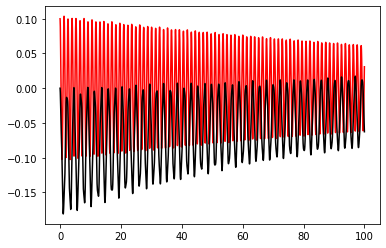

In [57]:
def windForceModel(x, w = 3, A = 1):
    # x is a vector of the form [y, y', theta, theta', time]
    # want to return the respective derivatives - [y', y'', theta', theta'']
    
    y = x[0]
    y_1 = x[1]
    theta = x[2]
    theta_1 = x[3]
    
    #these are the forces    
    y_2 = -d * y_1 - K/(M*a) * (np.exp(a * (y - l * np.sin(theta))) - 1 + np.exp(a * (y + l * np.sin(theta))) - 1)
    
    #add the wind component
    y_2 += A/M * np.sin(w * x[4])
    
    theta_2 = -d * theta_1 + 3 * np.cos(theta) / l * K / (M * a) * ( np.exp(a * (y - l * np.sin(theta))) - np.exp(a * (y + l * np.sin(theta))))
    #we already have y_1 and theta_1
    
    return [y_1, y_2, theta_1, theta_2]




times, theta, y = tacoma(cromer=True, theta_init = 0.1, eqs = lambda x : windForceModel(x, w = 2.755, A =2))

plt.plot(times, theta, 'r')
plt.plot(times, y, 'k')

plt.show()

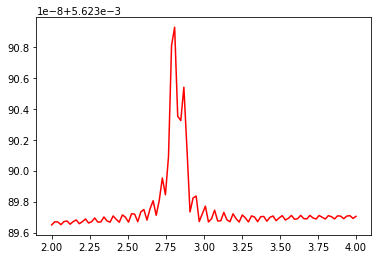

In [59]:
# plot RMS for y against w

rmsY = []
rmsT = []

w_array = np.linspace(2,4,100)

for w in w_array:
    times, theta, y = tacoma(cromer=True, theta_init = 0.01, eqs = lambda x : windForceModel(x, w=w, A =2))
    
    rmsY.append(np.std(y))
    rmsT.append(np.std(theta))
    
#     rmsY.append(np.sqrt(np.mean(y ** 2)))
#     rmsT.append(np.sqrt(np.mean(theta ** 2)))

#plt.plot(w_array, rmsY,'k')
plt.plot(w_array, rmsT,'r')

plt.show()

## Problem 4 : Time trajectories


Analyse the results by plotting the time trajectories of $\theta(t)$ as a function
of $y(t)$ (for $A=2$ and $omega$ between $2$ and $4$). Comment on the obtained results.



## Open questions

We propose here a set of open-ended questions, which will provide opportunities to expand the discussion in your report. 


0. The tacoma bridge is of course not only a section standing by itself, but a set of coupled oscillators which represents different sections of the bridge connected to the same cable. What would be your overall strategy to extend your model to the whole bridge? 

0. Can you think of, or find in the literature, other examples that would exhibit similar behavior (resonance or chaotic) ? 

0. What would your suggested strategy to avoir the occurence of resonance in this system of coupled differential equations? 

Share and discuss your results with others in the class !

 


Answers : 
    
    
    .......
    
    
    .......
    
    
    .......